### Logistic Regression

In this notebook, we will work with the **'diabetes' dataset**, which includes several features such as **Pregnancies**, **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI**, **DiabetesPedigreeFunction**, and **Age**. The target variable, **Outcome**, indicates whether a patient has diabetes (1) or not (0). 

Our goal is to build a model capable of predicting, based on the input features, whether a patient is likely to have diabetes. In essence, we are addressing a **binary classification task**.

To tackle this problem, we will use **Logistic Regression** (more detail about the model are explained later).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scratch_libraries.logistic_regression import LogisticRegression
from scratch_libraries.evaluation_metrics import ClassificationMetrics
from scratch_libraries.utilities import plot_theta_gd

In [2]:
df = pd.read_csv('./datasets/diabetes.csv')

display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
df = df.sample(frac=1, random_state=123).reset_index(drop=True)

In [5]:
features_names, label_name = df.columns[:-1], df.columns[-1]

x = df[features_names].values
y = df[label_name].values

In [6]:
train_index = round(len(x) * 0.8)

x_train = x[:train_index]
y_train = y[:train_index]
x_test = x[train_index:]
y_test = y[train_index:]

In [7]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [8]:
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
x_test = np.c_[np.ones(x_test.shape[0]), x_test]

Logistic Regression is a model designed to estimate the probability that an observation belongs to the positive class in a binary classification task.

The hypothesis function in logistic regression is computed as:

$$
h_\theta(x) = g(\theta^T x) = g(z)
$$

where $ g(z) $ is the sigmoid function, defined as:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

This ensures that the output of $ h_\theta(x) $ always lies in the range $ (0, 1) $.  

**Note**: Since in this case the target variable can only take the values $ 0 $ or $ 1 $, we’re dealing with a **Bernoulli distribution**. This is why the output of $ h_\theta(x) $ is interpreted as a probability—it models the likelihood of $ y = 1 $, rather than being simply constrained by the range $ (0, 1) $.

This probability is then converted into a binary classification by comparing it against a predefined threshold (commonly 0.5).

In our case, for example, if $ h_\theta(x) = 0.7 $, it indicates a 70% probability that the input features of the patient corresponds to the patient having diabetes ($ y = 1 $). Since $ 0.7 $ is higher than a treshold of $ 0.5 $ we will classify it as patient having diabetes.

---

The cost function for logistic regression is given by:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left( y^{(i)} \log \left( h_\theta(x^{(i)}) \right) + \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta(x^{(i)}) \right) \right)
$$

This loss function is known as **Binary Cross-Entropy (BCE) Loss** or **Logistic Loss**.

The explicit form expression for the partial derivative of the cost function with respect to $\theta_j$ is given by:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

which is identical to the one derived for linear regression, but the key difference lies in the hypothesis function $ h_\theta(x) $, which is defined using the **sigmoid** function in logistic regression.

In [9]:
logistic_reg = LogisticRegression(learning_rate=0.1, n_steps=1000, n_features=x_train.shape[1])
cost_history, theta_history = logistic_reg.fit_fbgd(x_train, y_train)

In [10]:
print(ClassificationMetrics(logistic_reg).compute_performance(y_test, logistic_reg.predict(x_test)))

{'confusion_matrix': array([[92, 24],
       [ 6, 32]]), 'accuracy': 0.8051948051948052, 'error_rate': 0.19480519480519476, 'precision': 0.5714285714285714, 'recall': 0.8421052631578947, 'fn_rate': 0.1578947368421053, 'specificity': 0.7931034482758621, 'fp_rate': 0.2068965517241379, 'f1_score': 0.6808510638297872}


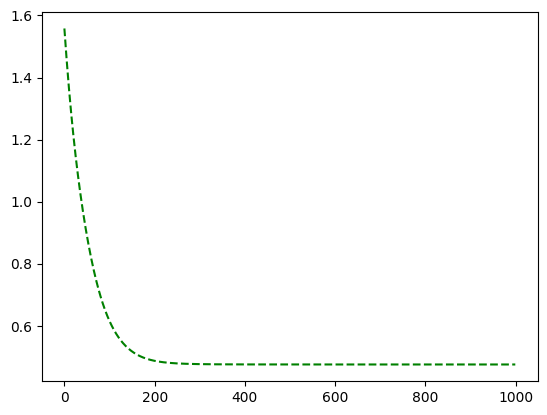

In [11]:
plt.plot(cost_history, 'g--')
plt.show()

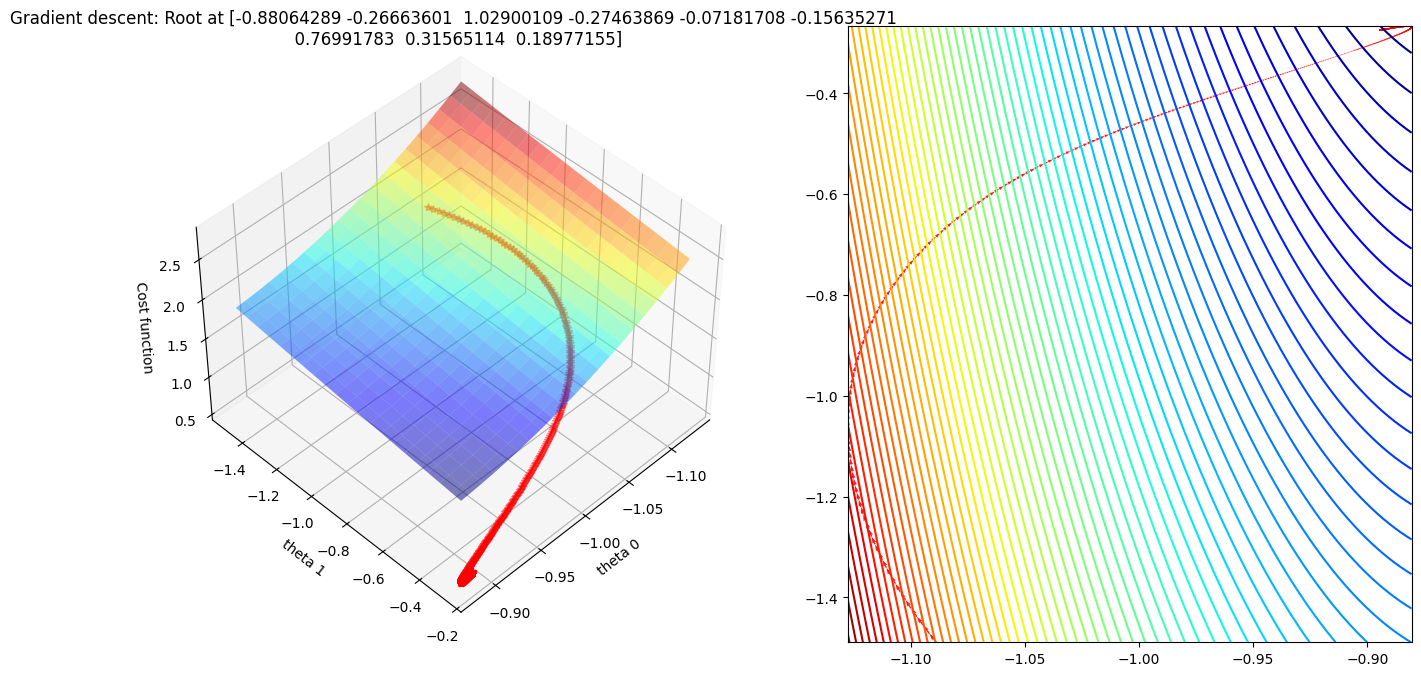

In [12]:
plot_theta_gd(x_train, y_train, logistic_reg, cost_history, theta_history, 0, 3)